Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004
00:00-01:00 - 7 calls
01:00-02:00 - 5 calls
02:00-03:00 - 8 calls
03:00-04:00 - 7 calls
04:00-05:00 - 21 calls
05:00-06:00 - 42 calls
06:00-07:00 - 96 calls
07:00-08:00 - 189 calls
08:00-09:00 - 274 calls
09:00-10:00 - 344 calls
10:00-11:00 - 487 calls
11:00-12:00 - 892 calls
12:00-13:00 - 869 calls
13:00-14:00 - 401 calls
14:00-15:00 - 206 calls
15:00-16:00 - 169 calls
16:00-17:00 - 261 calls
17:00-18:00 - 430 calls
18:00-19:00 - 579 calls
19:00-20:00 - 383 calls
20:00-21:00 - 136 calls
21:00-22:00 - 45 calls
22:00-23:00 - 28 calls
23:00-24:00 - 12 calls


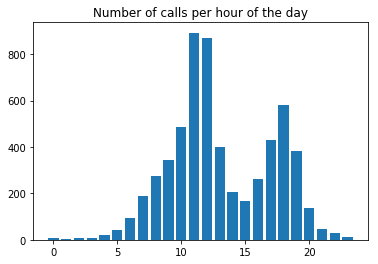

In [15]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot
import matplotlib.pyplot as plt

## Load the data set containing durations between calls arriving at the call center.
## All values are in minutes.
data = np.loadtxt('call_center.csv')

print('Size of data set:', len(data))
print('First 3 values in data set:', data[:3])
print('Sum of data set:', sum(data))

## Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in data:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times[current_hour].append(t)


for hour, waiting_times_per_hour in enumerate(waiting_times):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_per_hour)))
    
## Plot the number of calls per hour
plt.bar(range(24), [len(w) for w in waiting_times])
plt.title('Number of calls per hour of the day')
plt.show()
    

In [16]:
## Compute 95% posterior confidence intervals and posterior means for each hour of the day

def get_mean_and_confidence(hour_index):
    waiting_times_hour = waiting_times[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = stats.expon(scale=1 / lambda_)
    
    ## Fit an exponential distribution to the data for hour n
    prior_alpha = 1
    prior_beta = 0.25

    posterior_alpha = prior_alpha + len(waiting_times_hour)
    posterior_beta = prior_beta + sum(waiting_times_hour)
    print('Posterior α = %.1f, β = %.1f' % (posterior_alpha, posterior_beta))

    ## Create the distribution object. This is the posterior over λ
    posterior = stats.gamma(a=posterior_alpha, scale=1/posterior_beta)

    ## Compute 95% posterior confidence intervals
    posterior_confidence95 = (posterior.ppf(0.025), posterior.ppf(0.975))
    print('Posterior 95%% confidence interval: [%.1f, %.1f]' % posterior_confidence95)
    
    ## Compute posterior means
    posterior_mean = posterior.mean()
    print('Posterior mean: %.1f' % posterior_mean)
    
    ## Compute errorbar's scalars 
    scalars = posterior_confidence95[1] - posterior_mean
        
    return posterior_mean, scalars

hour_indexes = list(range(0, 24))
mean_ls = []
scalars_ls = []
for h in hour_indexes:
    print('Hour %02i:00-%02i:00' % (h, h + 1))
    m, s = get_mean_and_confidence(h)
    mean_ls.append(m)
    scalars_ls.append(s)
    

Hour 00:00-01:00
Posterior α = 8.0, β = 60.5
Posterior 95% confidence interval: [0.1, 0.2]
Posterior mean: 0.1
Hour 01:00-02:00
Posterior α = 6.0, β = 67.9
Posterior 95% confidence interval: [0.0, 0.2]
Posterior mean: 0.1
Hour 02:00-03:00
Posterior α = 9.0, β = 70.0
Posterior 95% confidence interval: [0.1, 0.2]
Posterior mean: 0.1
Hour 03:00-04:00
Posterior α = 8.0, β = 44.6
Posterior 95% confidence interval: [0.1, 0.3]
Posterior mean: 0.2
Hour 04:00-05:00
Posterior α = 22.0, β = 58.8
Posterior 95% confidence interval: [0.2, 0.5]
Posterior mean: 0.4
Hour 05:00-06:00
Posterior α = 43.0, β = 60.2
Posterior 95% confidence interval: [0.5, 0.9]
Posterior mean: 0.7
Hour 06:00-07:00
Posterior α = 97.0, β = 59.9
Posterior 95% confidence interval: [1.3, 2.0]
Posterior mean: 1.6
Hour 07:00-08:00
Posterior α = 190.0, β = 60.2
Posterior 95% confidence interval: [2.7, 3.6]
Posterior mean: 3.2
Hour 08:00-09:00
Posterior α = 275.0, β = 60.5
Posterior 95% confidence interval: [4.0, 5.1]
Posterior mean

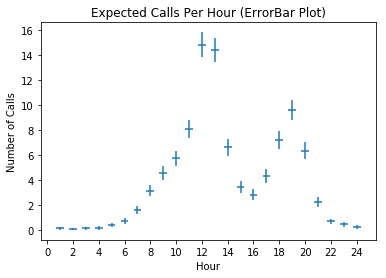

In [17]:
import seaborn as sns

## Create arrays for posterior means and scalars 
means_np = np.array(mean_ls)
scalars_np = np.array(scalars_ls)
hour_indexes_np = np.array(hour_indexes)
hours = hour_indexes_np + 1

## Plot expected calls' errorbar 
plt.errorbar(hours, means_np, xerr = 0.3, yerr=scalars_np, linestyle = '')
plt.title('Expected Calls Per Hour (ErrorBar Plot)', loc = 'center')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 25, step = 2))
plt.ylabel('Number of Calls')
plt.show()



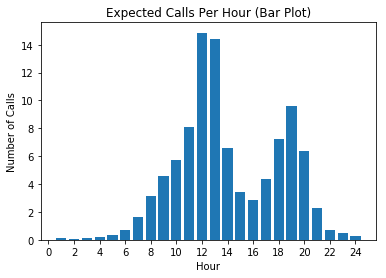

In [18]:
## Plot expected calls' bar 
plt.bar(hours, means_np)
plt.title('Expected Calls Per Hour (Bar Plot)', loc = 'center')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 25, step = 2))
plt.ylabel('Number of Calls')
plt.show()


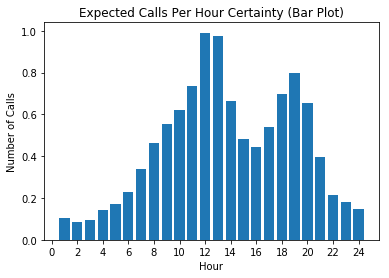

In [14]:
## Plot expected calls' certainty
plt.bar(hours, scalars_np)
plt.title('Expected Calls Per Hour Certainty (Bar Plot)', loc = 'center')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 25, step = 2))
plt.ylabel('Number of Calls')
plt.show()